# Assignment 2

Adam McDaniel, Elias Kokkas, and Gaddy Morales

## Import Libraries

In [2]:
import os
import cv2
import librosa
import librosa.display
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from scipy.fftpack import fft
from scipy.signal import argrelextrema
import heapq
from scipy.signal import medfilt

## Load, Spectrogram and Bin the Files

In [3]:
ROOT_DIR = './train'


SAMPLINGS = 1323000
SAMPLING_RATE = 44100
WINDOW = None
TIME_BIN_COUNT = 6
FREQUENCY_BIN_COUNT = 6
BIN_SHAPE = (TIME_BIN_COUNT, FREQUENCY_BIN_COUNT)

def load_a_wav(wav_path: str) -> np.ndarray:
    '''
    Loads a wave file.
    '''
    # Get the samples and the sampling rate of the wav file
    samples, sampling_rate = librosa.load(wav_path, sr=None, mono=True, offset=0.0, duration=30)
    
    return samples

def fft_method(audio):
    # variables
    T = 1/SAMPLING_RATE
    N = SAMPLINGS
    max_val = 1.0/(2.0*T) # max frequency spectrum of the FFT.
    num_vals = N//2  
    
    # calculate fft
    yf_all = fft(audio)
    
    xf = np.linspace(0.0, max_val, num_vals)
    yf = 2.0/N * np.abs(yf_all[0:num_vals])
    
    return xf, yf

def spec_a_wav(wav_path: str, fft_size: int = None) -> np.ndarray:
    '''
    Spectrograms a wave file.
    '''
    # Get the samples and the sampling rate of the wav file
    samples, sampling_rate = librosa.load(wav_path, sr=None, mono=True, offset=0.0, duration=30)

    if not fft_size:
        fft_size = 4096

    # Get the frequency, time, and spectrogram of the wav file
    f, t, pxx = signal.spectrogram(
        samples,
        nperseg=fft_size,
        fs=1 / sampling_rate,
        noverlap=fft_size/2
    )
    data = np.log10(pxx[:,:])
    
    return data

def bin_a_wav(wav_path: str, time_bin_count: int = TIME_BIN_COUNT, freq_bin_count: int = FREQUENCY_BIN_COUNT, window=None, fft_size: int = None) -> np.ndarray:
    '''
    Bins a wave file into a 2D vector of shape (freq_bin_count, time_bin_count).
    '''
    # Get the samples and the sampling rate of the wav file
    samples, sampling_rate = librosa.load(wav_path, sr=None, mono=True, offset=0.0, duration=30)

    if not fft_size:
        fft_size = 4096

    # Get the frequency, time, and spectrogram of the wav file
    f, t, pxx = signal.spectrogram(
        samples,
        nperseg=fft_size,
        fs=1 / sampling_rate,
        noverlap=fft_size/2,
        **{} if window is None else dict(window=window)
    )
    # Resize the spectrogram to the desired shape (time_bin_count, freq_bin_count)
    data = np.log10(cv2.resize(pxx[:,:], (time_bin_count, freq_bin_count)))
    return data

# Get the list of all the wav files for each class
music_files      = [f'{ROOT_DIR}/music/{f}' for f in os.listdir(f'{ROOT_DIR}/music')[:20]]
print('Collected music files')
vacuum_files     = [f'{ROOT_DIR}/vacuum/{f}' for f in os.listdir(f'{ROOT_DIR}/vacuum')[:20]]
print('Collected vacuum files')
blender_files    = [f'{ROOT_DIR}/blender/{f}' for f in os.listdir(f'{ROOT_DIR}/blender')[:20]]
print('Collected blender files')
silence_files    = [f'{ROOT_DIR}/silence/{f}' for f in os.listdir(f'{ROOT_DIR}/silence')[:20]]
print('Collected silence files')
microwave_files  = [f'{ROOT_DIR}/microwave/{f}' for f in os.listdir(f'{ROOT_DIR}/microwave')[:20]]
print('Collected microwave files')
fire_alarm_files = [f'{ROOT_DIR}/fire alarm/{f}' for f in os.listdir(f'{ROOT_DIR}/fire alarm')[:20]]
print('Collected fire alarm files')

print('Done👍')

Collected music files
Collected vacuum files
Collected blender files
Collected silence files
Collected microwave files
Collected fire alarm files
Done👍


## Load the  wav files

In [4]:
# Load the wav files
music_load      = [load_a_wav(f) for f in music_files]
print('Spectrogram for music files')
vacuum_load   = [load_a_wav(f) for f in vacuum_files]
print('Spectrogram for vacuum files')
blender_load   = [load_a_wav(f) for f in blender_files]
print('Spectrogram for blender files')
silence_load    = [load_a_wav(f) for f in silence_files]
print('Spectrogram for silence files')
microwave_load  = [load_a_wav(f) for f in microwave_files]
print('Spectrogram for microwave files')
fire_alarm_load = [load_a_wav(f) for f in fire_alarm_files]
print('Spectrogram for fire alarm files')

Spectrogram for music files
Spectrogram for vacuum files
Spectrogram for blender files
Spectrogram for silence files
Spectrogram for microwave files
Spectrogram for fire alarm files


## Spectrogram the  wav files

In [5]:
# Spec the wav files
music_spec      = [spec_a_wav(f) for f in music_files]
print('Spectrogram for music files')
vacuum_spec   = [spec_a_wav(f) for f in vacuum_files]
print('Spectrogram for vacuum files')
blender_spec   = [spec_a_wav(f) for f in blender_files]
print('Spectrogram for blender files')
silence_spec    = [spec_a_wav(f) for f in silence_files]
print('Spectrogram for silence files')
microwave_spec  = [spec_a_wav(f) for f in microwave_files]
print('Spectrogram for microwave files')
fire_alarm_spec = [spec_a_wav(f) for f in fire_alarm_files]
print('Spectrogram for fire alarm files')

Spectrogram for music files
Spectrogram for vacuum files


/tmp/ipykernel_38680/1698844809.py:52: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(pxx[:,:])


Spectrogram for blender files
Spectrogram for silence files
Spectrogram for microwave files
Spectrogram for fire alarm files


### Graph the Audio Signal

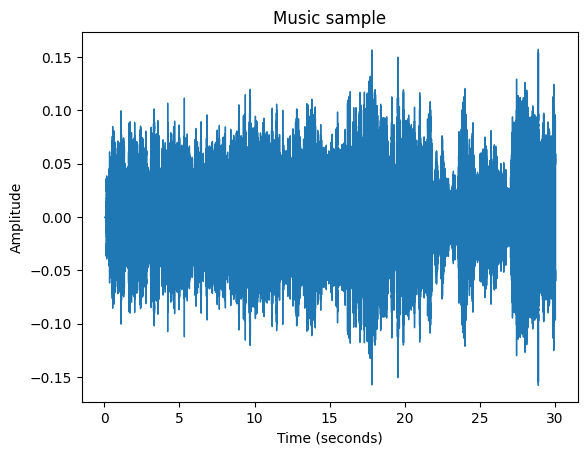

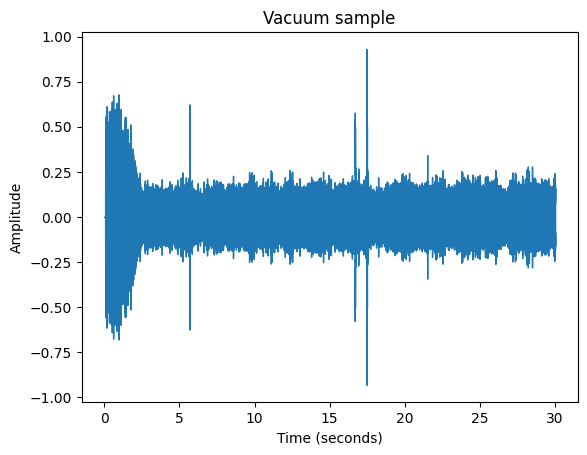

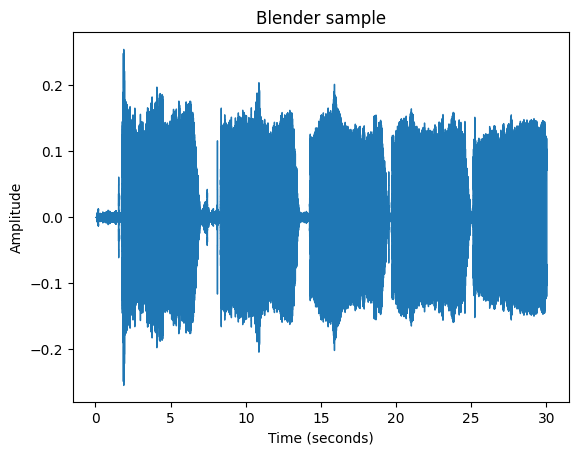

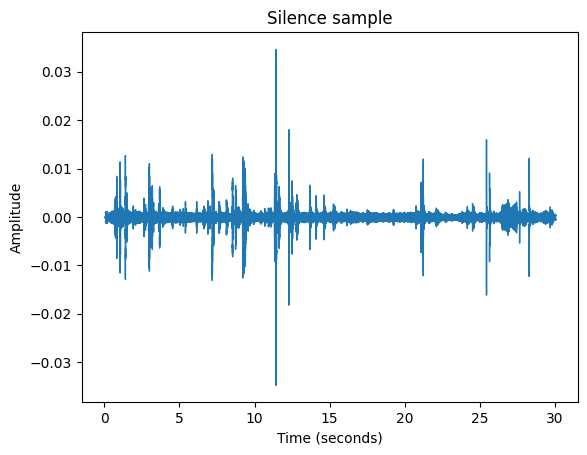

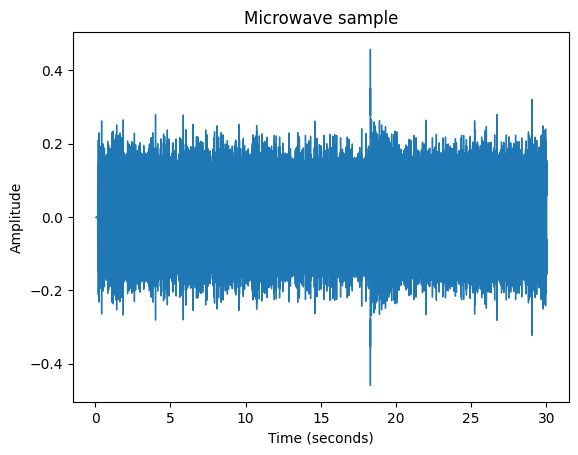

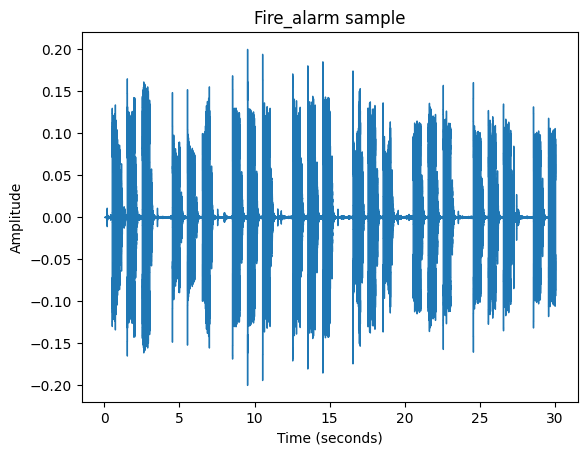

In [6]:
# Graph the audio signal of the first wav file in each class
plt.figure()
librosa.display.waveshow(music_load[0], sr=SAMPLING_RATE)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Music sample")
plt.show()

plt.figure()
librosa.display.waveshow(vacuum_load[0], sr=SAMPLING_RATE)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Vacuum sample")
plt.show()

plt.figure()
librosa.display.waveshow(blender_load[0], sr=SAMPLING_RATE)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Blender sample")
plt.show()

plt.figure()
librosa.display.waveshow(silence_load[0], sr=SAMPLING_RATE)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Silence sample")
plt.show()

plt.figure()
librosa.display.waveshow(microwave_load[0], sr=SAMPLING_RATE)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Microwave sample")
plt.show()

plt.figure()
librosa.display.waveshow(fire_alarm_load[0], sr=SAMPLING_RATE)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Fire_alarm sample")
plt.show()

### Example of filtering

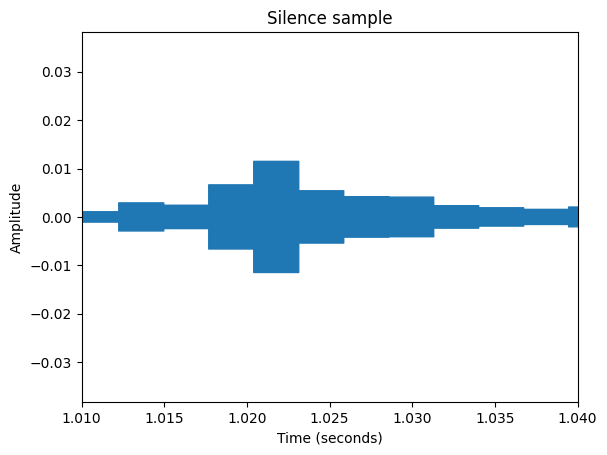

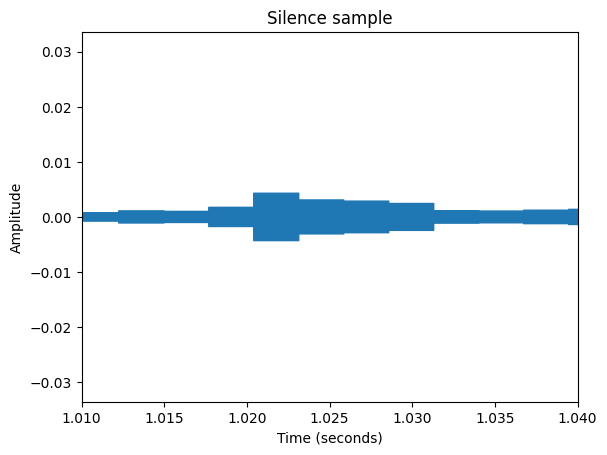

In [7]:
fsilence_load=medfilt(silence_load[0],5)

plt.figure()
librosa.display.waveshow(silence_load[0], sr=SAMPLING_RATE)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Silence sample")
plt.xlim([1.01, 1.04])
plt.show()

plt.figure()
librosa.display.waveshow(fsilence_load, sr=SAMPLING_RATE)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Silence sample")
plt.xlim([1.01, 1.04])
plt.show()

## Graph the Signal in Frequency domain

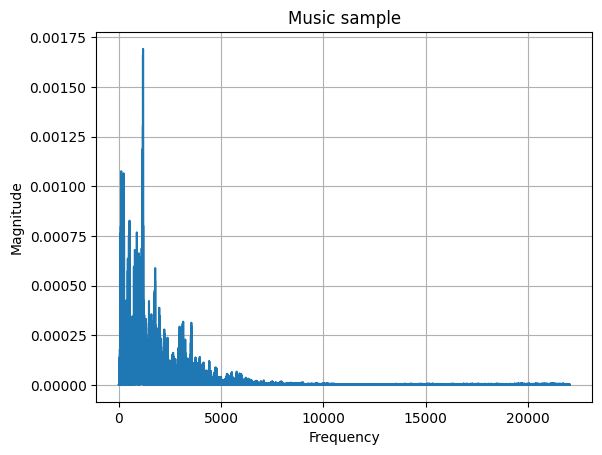

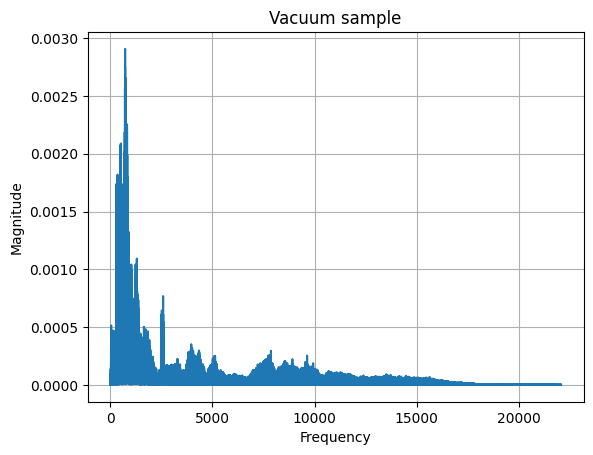

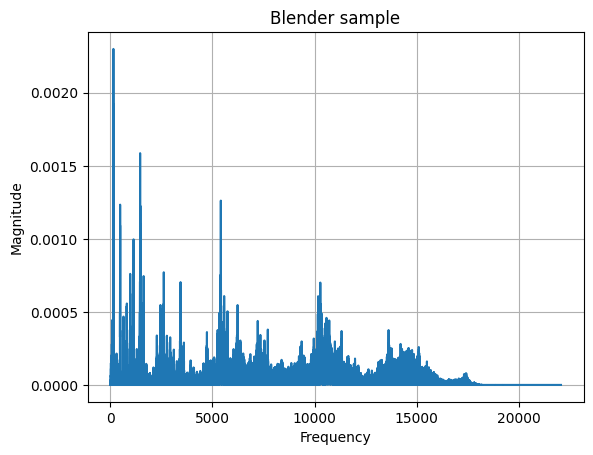

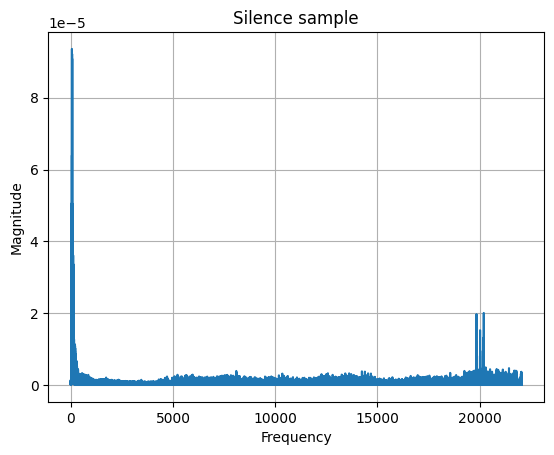

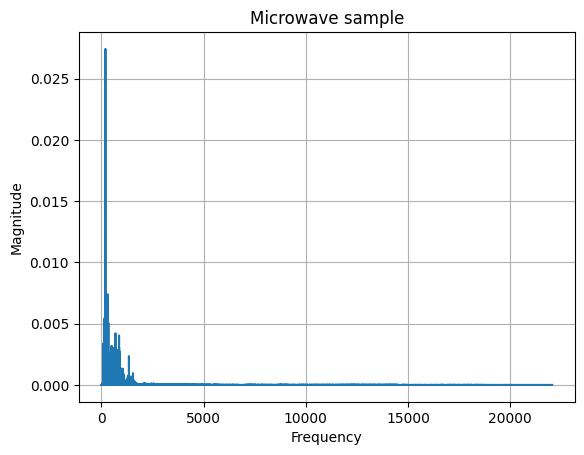

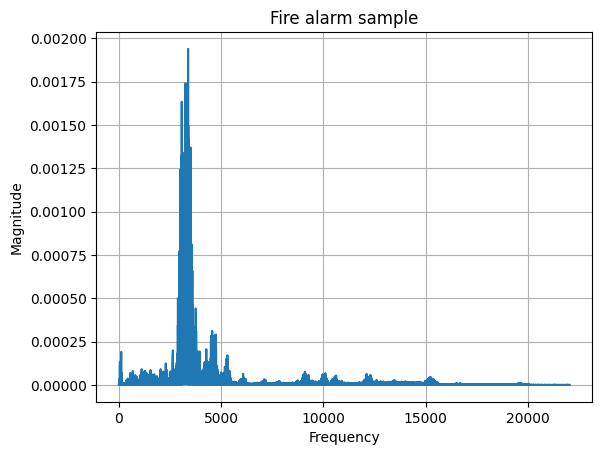

In [8]:
xf1, yf1 = fft_method(music_load[0])

fig, ax = plt.subplots()
ax.plot(xf1, yf1)
plt.grid()
plt.title("Music sample")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

xf2, yf2 = fft_method(vacuum_load[0])

fig, ax = plt.subplots()
ax.plot(xf2, yf2)
plt.grid()
plt.title("Vacuum sample")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

xf3, yf3 = fft_method(blender_load[0])

fig, ax = plt.subplots()
ax.plot(xf3, yf3)
plt.grid()
plt.title("Blender sample")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

xf4, yf4 = fft_method(silence_load[0])

fig, ax = plt.subplots()
ax.plot(xf4, yf4)
plt.grid()
plt.title("Silence sample")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

xf5, yf5 = fft_method(microwave_load[0])

fig, ax = plt.subplots()
ax.plot(xf5, yf5)
plt.grid()
plt.title("Microwave sample")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

xf6, yf6 = fft_method(fire_alarm_load[0])

fig, ax = plt.subplots()
ax.plot(xf6, yf6)
plt.grid()
plt.title("Fire alarm sample")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Graph the Spectrograms

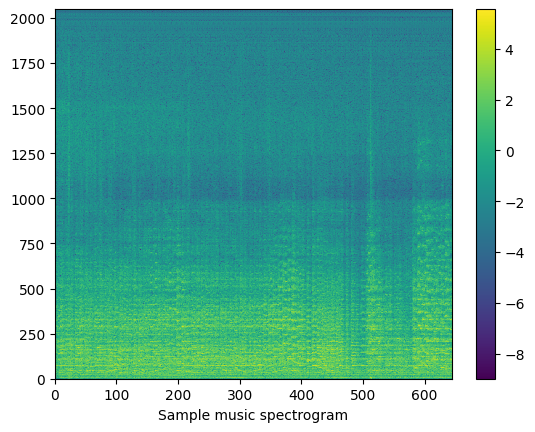

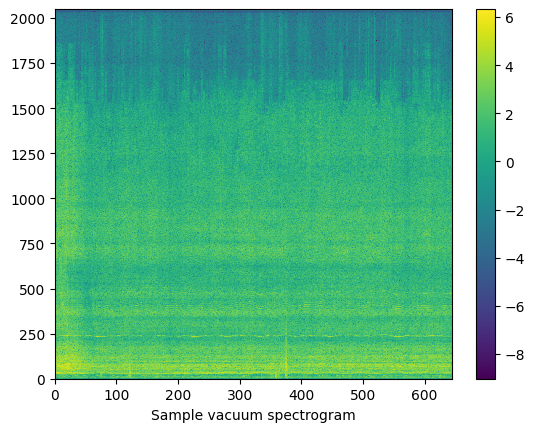

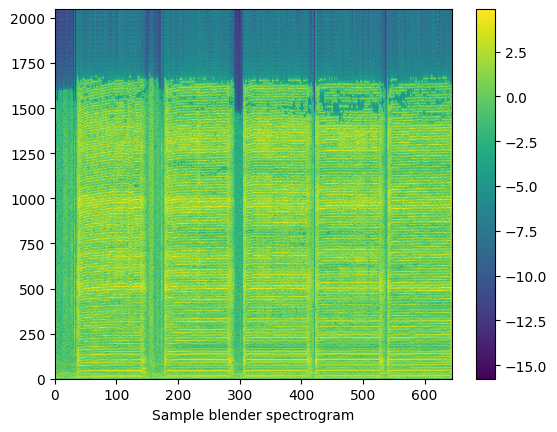

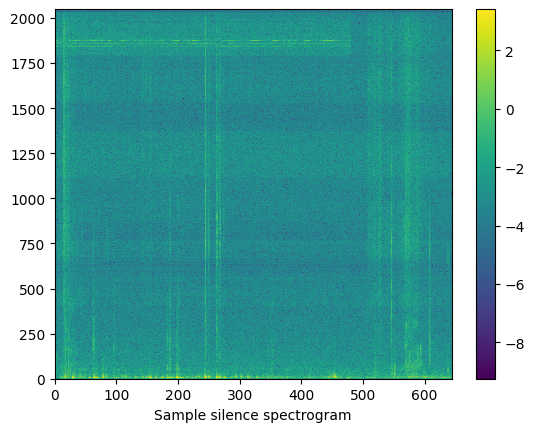

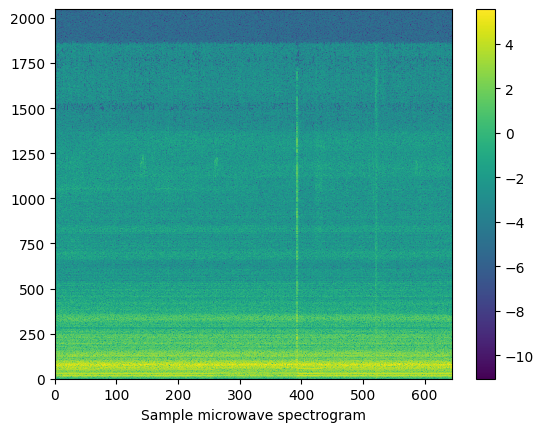

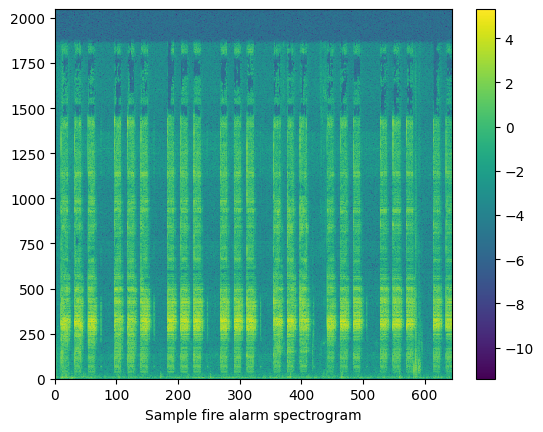

In [9]:
# Graph the spectrogram of the first wav file in each class
plt.xlabel("Sample music spectrogram")
plt.pcolormesh(music_spec[0])
plt.colorbar()
plt.show()
plt.xlabel("Sample vacuum spectrogram")
plt.pcolormesh(vacuum_spec[0])
plt.colorbar()
plt.show()
plt.xlabel("Sample blender spectrogram")
plt.pcolormesh(blender_spec[0])
plt.colorbar()
plt.show()
plt.xlabel("Sample silence spectrogram")
plt.pcolormesh(silence_spec[0])
plt.colorbar()
plt.show()
plt.xlabel("Sample microwave spectrogram")
plt.pcolormesh(microwave_spec[0])
plt.colorbar()
plt.show()
plt.xlabel("Sample fire alarm spectrogram")
plt.pcolormesh(fire_alarm_spec[0])
plt.colorbar()
plt.show()

## Bin The Data

In [10]:
# Bin the wav files
music_bins      = [bin_a_wav(f) for f in music_files]
print('Binned music files')
vacuum_bins     = [bin_a_wav(f) for f in vacuum_files]
print('Binned vacuum files')
blender_bins    = [bin_a_wav(f) for f in blender_files]
print('Binned blender files')
silence_bins    = [bin_a_wav(f) for f in silence_files]
print('Binned silence files')
microwave_bins  = [bin_a_wav(f) for f in microwave_files]
print('Binned microwave files')
fire_alarm_bins = [bin_a_wav(f) for f in fire_alarm_files]
print('Binned fire alarm files')

# Confirm that the shape of the binned data is correct
assert len(music_bins) == 20, "music_bins shape is wrong, maybe you're missing music files?"
assert len(vacuum_bins) == 20, "vacuum_bins shape is wrong, maybe you're missing vacuum files?"
assert len(blender_bins) == 20, "blender_bins shape is wrong, maybe you're missing blender files?"
assert len(silence_bins) == 20, "silence_bins shape is wrong, maybe you're missing silence files?"
assert len(microwave_bins) == 20, "microwave_bins shape is wrong, maybe you're missing microwave files?"
assert len(fire_alarm_bins) == 20, "fire_alarm_bins shape is wrong, maybe you're missing fire alarm files?"

print('Done👍')

Binned music files
Binned vacuum files
Binned blender files
Binned silence files
Binned microwave files
Binned fire alarm files
Done👍


## Graph Binned Spectrograms

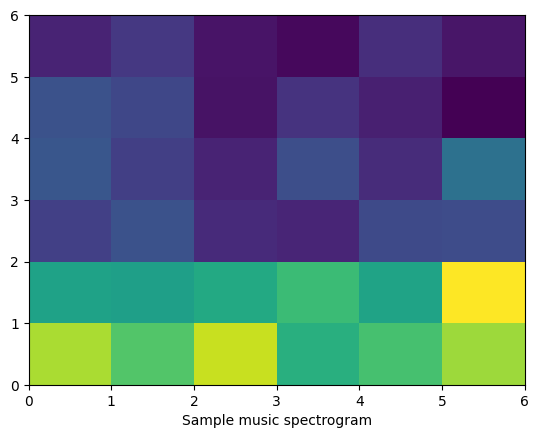

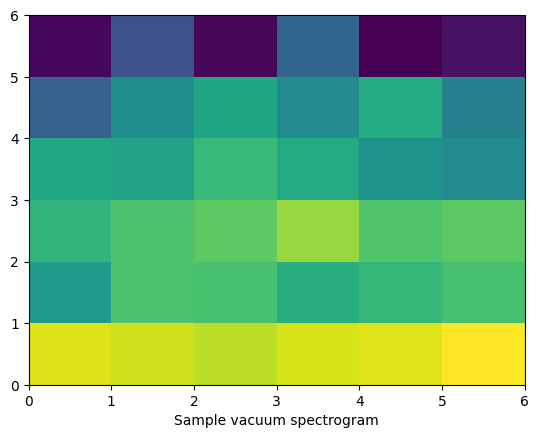

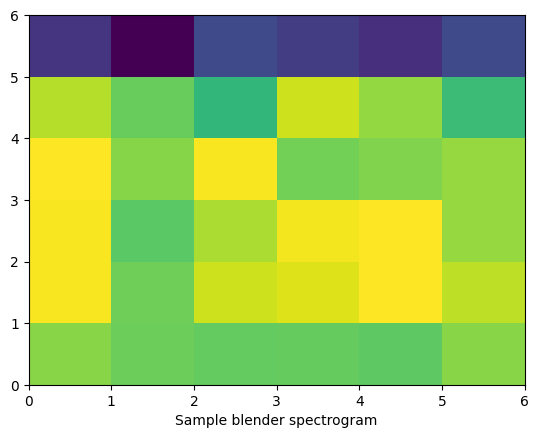

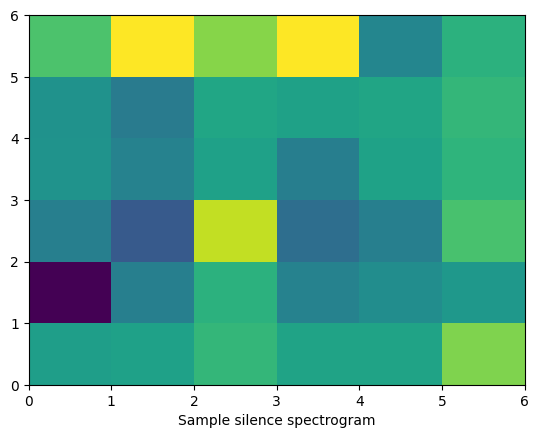

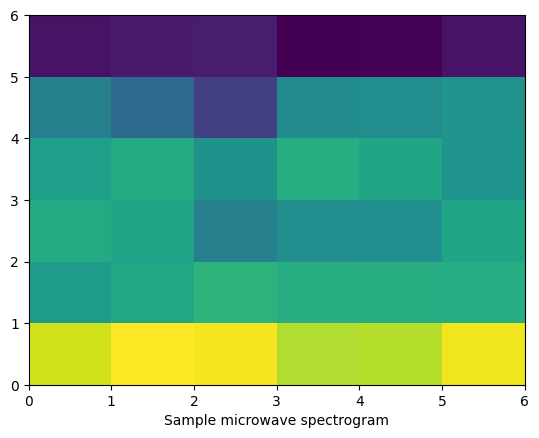

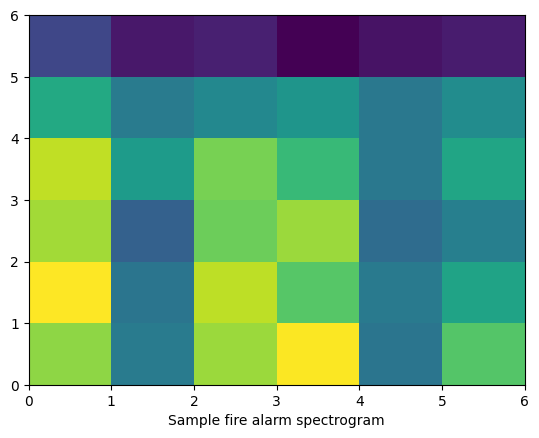

In [11]:
# Graph the spectrogram of the first wav file in each class
plt.xlabel("Sample music spectrogram")
plt.pcolormesh(music_bins[0])
plt.show()
plt.xlabel("Sample vacuum spectrogram")
plt.pcolormesh(vacuum_bins[0])
plt.show()
plt.xlabel("Sample blender spectrogram")
plt.pcolormesh(blender_bins[0])
plt.show()
plt.xlabel("Sample silence spectrogram")
plt.pcolormesh(silence_bins[0])
plt.show()
plt.xlabel("Sample microwave spectrogram")
plt.pcolormesh(microwave_bins[0])
plt.show()
plt.xlabel("Sample fire alarm spectrogram")
plt.pcolormesh(fire_alarm_bins[0])
plt.show()

## Featurize #1: from Bins

To use the whole bin as the features, run the next code block and redefine `featurize` with the proper definition.

In [12]:
def featurize1(bins: np.ndarray) -> np.ndarray:
    '''
    Flattens the 2D binned spectrogram into a "feature vector", which is just the contents of the bins.

    Using this definition satisfies the first approach to feature extraction in the assignment.
    '''
    return np.array([bins.flatten()])

print('Using featurization approach #1: each bin as a feature')
print('Done👍')

Using featurization approach #1: each bin as a feature
Done👍


## Create Training Data #1

In [13]:
# Featurize the binned data
music_features      = np.concatenate([featurize1(b) for b in music_bins], axis=0)
print('Created music data')
vacuum_features     = np.concatenate([featurize1(b) for b in vacuum_bins], axis=0)
print('Created vacuum data')
blender_features    = np.concatenate([featurize1(b) for b in blender_bins], axis=0)
print('Created blender data')
silence_features    = np.concatenate([featurize1(b) for b in silence_bins], axis=0)
print('Created silence data')
microwave_features  = np.concatenate([featurize1(b) for b in microwave_bins], axis=0)
print('Created microwave data')
fire_alarm_features = np.concatenate([featurize1(b) for b in fire_alarm_bins], axis=0)
print('Created fire alarm data')

features1 = (music_features, vacuum_features, blender_features, silence_features, microwave_features, fire_alarm_features)

# This is the data we will use to train our model
data1 = np.concatenate(features1, axis=0)

print('Created training data')
print('Done👍')

Created music data
Created vacuum data
Created blender data
Created silence data
Created microwave data
Created fire alarm data
Created training data
Done👍


## Create Training Labels

In [14]:
# Assign labels to the classes
label_values = {
    'music': 0.0,
    'vacuum': 1.0,
    'blender': 2.0,
    'silence': 3.0,
    'microwave': 4.0,
    'fire alarm': 5.0,
}

# A convenient table to look up the label names from the label values
label_names = {
    0: 'music',
    1: 'vacuum',
    2: 'blender',
    3: 'silence',
    4: 'microwave',
    5: 'fire alarm',
}

#Assigning groundtruth conditions to each participant. 
music_labels      = [label_values['music']] * len(music_features)
print('Created music labels')
vacuum_labels     = [label_values['vacuum']] * len(vacuum_features)
print('Created vacuum labels')
blender_labels    = [label_values['blender']] * len(blender_features)
print('Created blender labels')
silence_labels    = [label_values['silence']] * len(silence_features)
print('Created silence labels')
microwave_labels  = [label_values['microwave']] * len(microwave_features)
print('Created microwave labels')
fire_alarm_labels = [label_values['fire alarm']] * len(fire_alarm_features)
print('Created fire alarm labels')

# This is the ground truth labels for the data
labels = np.concatenate((music_labels, vacuum_labels, blender_labels, silence_labels, microwave_labels, fire_alarm_labels), axis=0)

print('Done👍')

Created music labels
Created vacuum labels
Created blender labels
Created silence labels
Created microwave labels
Created fire alarm labels
Done👍


## Train and Test a Classifier #1

Average cross-validation score: 0.9333333333333333 



/home/adam/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Test Statistics:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      1.00      1.00        10
         2.0       1.00      1.00      1.00        10
         3.0       1.00      1.00      1.00        11
         4.0       0.69      1.00      0.82         9
         5.0       1.00      0.64      0.78        11

    accuracy                           0.93        60
   macro avg       0.95      0.94      0.93        60
weighted avg       0.95      0.93      0.93        60



Testing Accuracy: 0.9333333333333333
Done👍


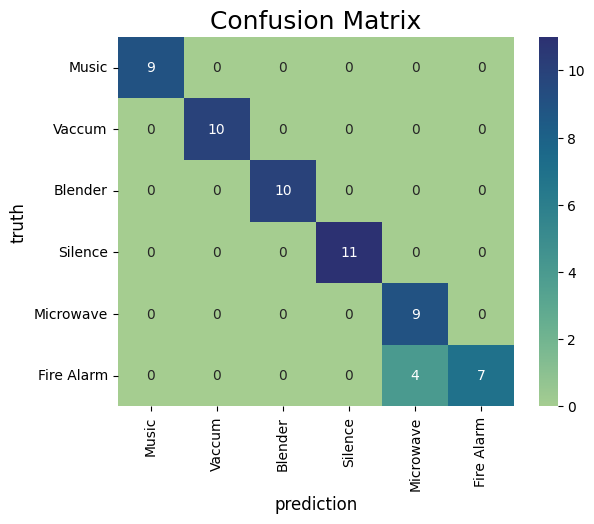

In [15]:
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(data1, labels, random_state=13, test_size=0.5)

# Create the model
clf = SVC(kernel='rbf', gamma='auto')
# Train the model
clf.fit(xtrain, ytrain)

# Score the cross-validation the model
cv_scores = cross_val_score(clf, xtrain, ytrain, cv=10)
print('Average cross-validation score:', cv_scores.mean(), '\n')

# Get the predictions for the test set
ypred = clf.predict(xtest)

# Print a confusion matrix
cm = confusion_matrix(ytest, ypred)
cm_cfg = pd.DataFrame(cm,index=["Music","Vaccum","Blender","Silence","Microwave","Fire Alarm"],columns = ["Music","Vaccum","Blender","Silence","Microwave","Fire Alarm"])
sns.heatmap(cm_cfg, annot=True,fmt = ".3g", cmap="crest")
plt.title('Confusion Matrix', fontsize = 18)
plt.xlabel('prediction', fontsize = 12)
plt.ylabel('truth', fontsize = 12)

# Print a classification report
cr = classification_report(ytest, ypred)
print('Test Statistics:', cr, '\n', sep='\n')

# How accurate was the model?
print('Testing Accuracy:', accuracy_score(ytest, ypred))
print('Done👍')

# Live Demo

In [16]:
from ipywebrtc import AudioRecorder, CameraStream
from IPython.display import Audio
camera = CameraStream(constraints={'audio': True, 'video': False})
recorder = AudioRecorder(stream=camera, filename='recording.mp3', autosave=True)

recorder

AudioRecorder(audio=Audio(value=b'', format='webm'), autosave=True, filename='recording.mp3', stream=CameraStr…

In [17]:
def classify(path: str) -> str:
    features = featurize1(bin_a_wav('livedemo.wav'))
    result = clf.predict(features)
    return label_names[int(result[0])]
try:
    recorder.save()
    print('Recording saved')
    !ffmpeg -i recording.mp3 -ac 1 -f wav livedemo.wav -y -hide_banner -loglevel panic
    bins = bin_a_wav('livedemo.wav', TIME_BIN_COUNT, FREQUENCY_BIN_COUNT, WINDOW)
    print('Prediction:', classify('livedemo.wav'))
    plt.xlabel("Recorded spectrogram")
    plt.pcolormesh(bins)
    plt.show()
except:
    print('Recording failed')


Recording failed


## Featurize #2: Extract Domain Specific Features without windows

In [18]:
def rms(s):
    return np.sqrt(np.mean(s**2))

def featurize2(file_load):
    '''
    Featurizes a 2D binned spectrogram into a feature vector (by extracting domain specific features).

    Using this definition satisfies the second approach to feature extraction in the assignment.
    '''
    out = []
    
    for n in range(0, 20):
        
        xf, yf = fft_method(medfilt(file_load[n],5))
        
        a1 = np.where(yf==max(yf))
        b1 = a1[0][0]
        
        Npeaks = heapq.nlargest(1000, yf)
        
        tl = []
        for m in Npeaks:
            a=np.where(yf==m)
            b=a[0][0]
            tl.append(xf[b])
    
       
        out.append([
            xf[b1],
            np.mean(tl),
            np.median(tl),
            np.var(tl),
            np.ptp(tl),
            np.quantile(tl,0.9),
            rms(file_load[n])
        ])

    return np.array(out)

print('Using featurization approach #2: extracting domain specific features without windowing')
print('Done👍')


Using featurization approach #2: extracting domain specific features without windowing
Done👍


## Create Training Data #2

In [19]:
features2 = (featurize2(music_load),featurize2(vacuum_load), featurize2(blender_load), featurize2(silence_load), featurize2(microwave_load), featurize2(fire_alarm_load))

data2 = np.concatenate(features2, axis=0)

print(data2.shape)


(120, 7)


## Plot Data #2

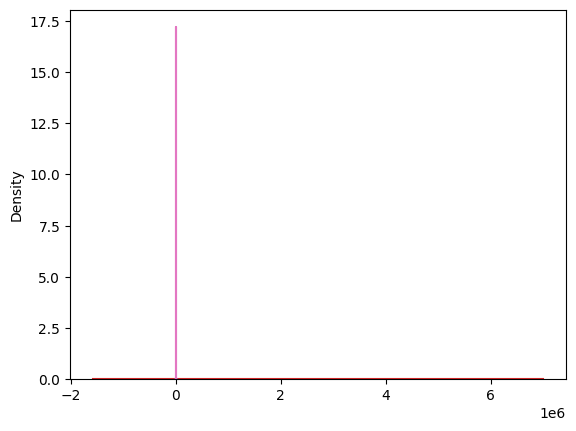

In [20]:
for i in range(data2.shape[1]):
    sns.kdeplot(data2[:,i])

## Normalize and Plot #2

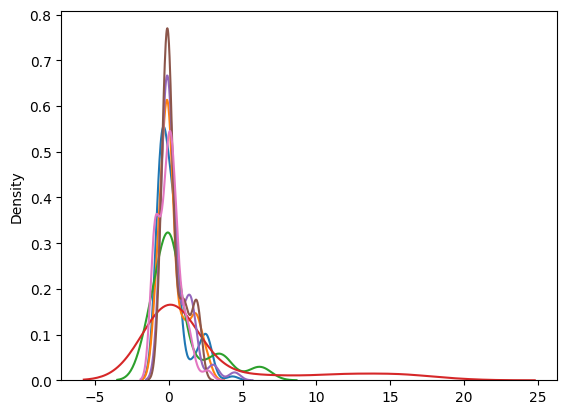

In [21]:
scaler = RobustScaler()
data2 = scaler.fit_transform(data2)
for i in range(data2.shape[1]):
    sns.kdeplot(data2[:,i])

## Train and Test a Classifier #2

Average cross-validation score: 0.773611111111111 

Test Statistics:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       0.80      0.80      0.80         5
         2.0       0.80      0.67      0.73         6
         3.0       1.00      1.00      1.00         8
         4.0       0.75      0.86      0.80         7
         5.0       0.80      0.80      0.80         5

    accuracy                           0.86        36
   macro avg       0.86      0.85      0.85        36
weighted avg       0.86      0.86      0.86        36



Testing Accuracy: 0.8611111111111112
Done👍


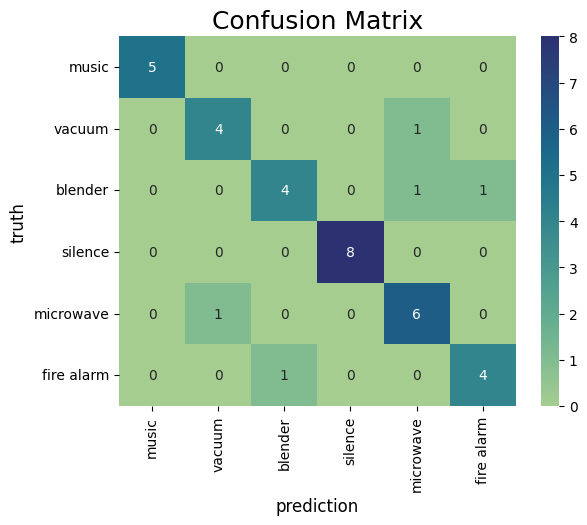

In [22]:
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(data2, labels, random_state=48, test_size=0.3)

# Create the model
clf = SVC(kernel='linear', gamma='auto')
# Train the model
clf.fit(xtrain, ytrain)

# Score the cross-validation the model
cv_scores = cross_val_score(clf, xtrain, ytrain, cv=10)
print('Average cross-validation score:', cv_scores.mean(), '\n')

# Get the predictions for the test set
ypred = clf.predict(xtest)

# Print a confusion matrix
cm = confusion_matrix(ytest, ypred)
cm_cfg = pd.DataFrame(cm, index=list(label_names.values()), columns=list(label_names.values()))
sns.heatmap(cm_cfg, annot=True,fmt = ".3g", cmap="crest")
plt.title('Confusion Matrix', fontsize = 18)
plt.xlabel('prediction', fontsize = 12)
plt.ylabel('truth', fontsize = 12)

# Print a classification report
cr = classification_report(ytest, ypred)
print('Test Statistics:', cr, '\n', sep='\n')

# How accurate was the model?
print('Testing Accuracy:', accuracy_score(ytest, ypred))
print('Done👍')

## Featurize #3: Extract Domain Specific Features with windows

In [23]:
SAMPLES = 1323000
SAMPLING_RATE = 44100
WINDOW = int(SAMPLES/15)

def make_windows(file_load) -> list[np.ndarray]:
    windows = librosa.util.frame(file_load, WINDOW, WINDOW//2, axis=0)
    
    return windows

windowed_music      = [make_windows(file) for file in music_load]
print('Windowed music files')
windowed_vacuum     = [make_windows(file) for file in vacuum_load]
print('Windowed vacuum files')
windowed_blender    = [make_windows(file) for file in blender_load]
print('Windowed blender files')
windowed_silence    = [make_windows(file) for file in silence_load]
print('Windowed silence files')
windowed_microwave  = [make_windows(file) for file in microwave_load]
print('Windowed microwave files')
windowed_fire_alarm = [make_windows(file) for file in fire_alarm_load]
print('Windowed fire_alarm files')
    
print('Done👍')

Windowed music files
Windowed vacuum files
Windowed blender files
Windowed silence files
Windowed microwave files
Windowed fire_alarm files
Done👍


/tmp/ipykernel_38680/1249439490.py:6: FutureWarning: Pass frame_length=88200, hop_length=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  windows = librosa.util.frame(file_load, WINDOW, WINDOW//2, axis=0)


In [24]:
def featurize3(samples: np.ndarray) -> np.ndarray:
    '''
    Featurizes a 2D binned spectrogram into a feature vector (by extracting domain specific features).

    Using this definition satisfies the second approach to feature extraction in the assignment.
    '''
    result = []
            
    xf, yf = fft_method(medfilt(samples,5))
        
    a1 = np.where(yf==max(yf))
    b1 = a1[0][0]
    Npeaks = heapq.nlargest(1000, yf)
        
    tl = []
    for m in Npeaks:
        a=np.where(yf==m)
        b=a[0][0]
        tl.append(xf[b])

    return np.array([
        xf[b1],
        np.mean(tl),
        np.median(tl),
        np.var(tl),
        np.ptp(tl),
        np.quantile(tl, 0.9)
    ])

print('Using featurization approach #2: extracting domain specific features without windowing')
print('Done👍')

Using featurization approach #2: extracting domain specific features without windowing
Done👍


In [25]:
def featurize_windowed_file(windowed_file):
    '''
    Take a list of windows (from a given file), and return the list of feature vectors for each window
    '''
    print('Featurizing windowed file')
    return list(map(featurize3, windowed_file))

def featurize_windowed_files(windowed_files):
    '''
    Take a list of files which have been windowed, and return the feature vectors for them.
    '''
    return np.concatenate(list(map(featurize_windowed_file, windowed_files)))

print('Featurizing music windows...')
windowed_music_features = featurize_windowed_files(windowed_music)
print('Featurized music windows👍')
print('Featurizing vacuum windows...')
windowed_vacuum_features = featurize_windowed_files(windowed_vacuum)
print('Featurized vacuum windows👍')
print('Featurizing blender windows...')
windowed_blender_features = featurize_windowed_files(windowed_blender)
print('Featurized blender windows👍')
print('Featurizing silence windows...')
windowed_silence_features = featurize_windowed_files(windowed_silence)
print('Featurized silence windows👍')
print('Featurizing microwave windows...')
windowed_microwave_features = featurize_windowed_files(windowed_microwave)
print('Featurized microwave windows👍')
print('Featurizing fire alarm windows...')
windowed_fire_alarm_features = featurize_windowed_files(windowed_fire_alarm)
print('Featurized fire alarm windows👍')
print('Done👍')

Featurizing music windows...
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurized music windows👍
Featurizing vacuum windows...
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featurizing windowed file
Featu

### Create Training Data #3

In [26]:
features3 = (
    windowed_music_features,
    windowed_vacuum_features,
    windowed_blender_features,
    windowed_silence_features,
    windowed_microwave_features,
    windowed_fire_alarm_features
)

# This is the ground truth for the data
data3 = np.concatenate(features3)

# Assign labels to the classes
label_values = {
    'music': 0.0,
    'vacuum': 1.0,
    'blender': 2.0,
    'silence': 3.0,
    'microwave': 4.0,
    'fire alarm': 5.0,
}

# A convenient table to look up the label names from the label values
label_names = {
    0: 'music',
    1: 'vacuum',
    2: 'blender',
    3: 'silence',
    4: 'microwave',
    5: 'fire alarm',
}

#Assigning groundtruth conditions to each participant. 
music_labels      = [label_values['music']] * windowed_music_features.shape[0]
print('Created music labels')
vacuum_labels     = [label_values['vacuum']] * windowed_vacuum_features.shape[0]
print('Created vacuum labels')
blender_labels    = [label_values['blender']] * windowed_blender_features.shape[0]
print('Created blender labels')
silence_labels    = [label_values['silence']] * windowed_silence_features.shape[0]
print('Created silence labels')
microwave_labels  = [label_values['microwave']] * windowed_microwave_features.shape[0]
print('Created microwave labels')
fire_alarm_labels = [label_values['fire alarm']] * windowed_fire_alarm_features.shape[0]
print('Created fire alarm labels')

# This is the ground truth labels for the data
labels3 = np.concatenate((music_labels, vacuum_labels, blender_labels, silence_labels, microwave_labels, fire_alarm_labels), axis=0)

print('Done👍')

Created music labels
Created vacuum labels
Created blender labels
Created silence labels
Created microwave labels
Created fire alarm labels
Done👍


In [27]:
data3.shape

(3480, 6)

## Plot and Normalize

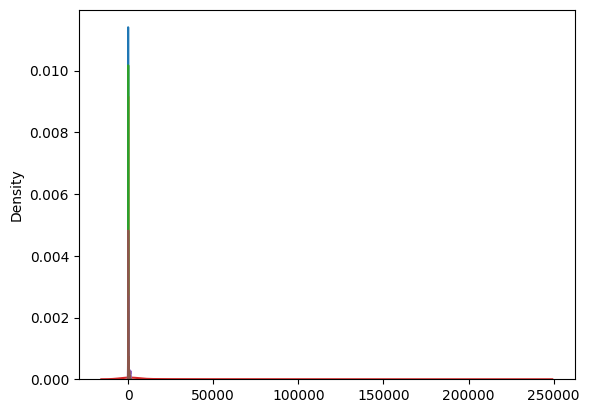

In [28]:
for i in range(data3.shape[1]):
    sns.kdeplot(data3[:,i])

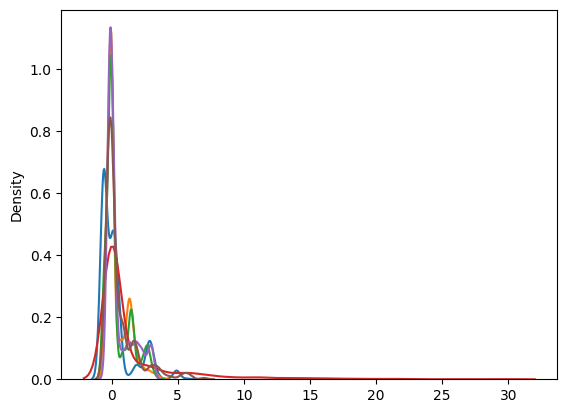

In [29]:
scaler = RobustScaler()
data3 = scaler.fit_transform(data3)
for i in range(data3.shape[1]):
    sns.kdeplot(data3[:,i])

## Train and Test a Classifier #3

Average cross-validation score: 0.82924171895028 



Text(50.72222222222221, 0.5, 'truth')

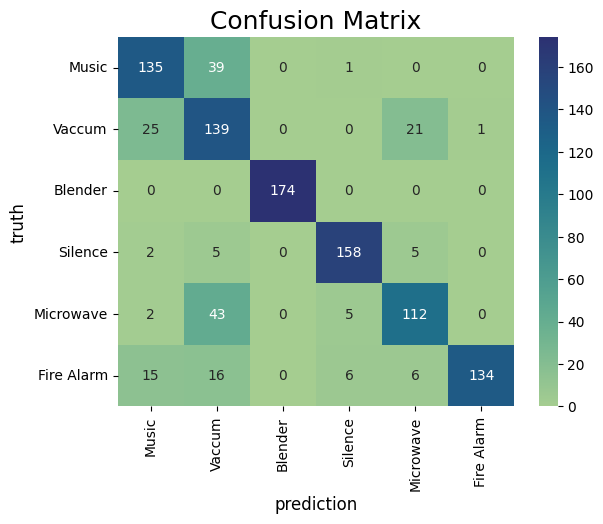

In [30]:
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(data3, labels3, random_state=21, test_size=0.3)

# Create the model
clf = SVC(kernel='rbf')
# Train the model
clf.fit(xtrain, ytrain)

# Score the cross-validation the model
cv_scores = cross_val_score(clf, xtrain, ytrain, cv=10)
print('Average cross-validation score:', cv_scores.mean(), '\n')

# Get the predictions for the test set
ypred = clf.predict(xtest)

# Print a confusion matrix
cm = confusion_matrix(ytest, ypred)
cm_cfg = pd.DataFrame(cm,index=["Music","Vaccum","Blender","Silence","Microwave","Fire Alarm"],columns = ["Music","Vaccum","Blender","Silence","Microwave","Fire Alarm"])
sns.heatmap(cm_cfg, annot=True,fmt = ".3g", cmap="crest")
plt.title('Confusion Matrix', fontsize = 18)
plt.xlabel('prediction', fontsize = 12)
plt.ylabel('truth', fontsize = 12)


In [31]:
# Print a classification report
cr = classification_report(ytest, ypred)
print('Test Statistics:', cr, '\n', sep='\n')

# How accurate was the model?
print('Testing Accuracy:', accuracy_score(ytest, ypred))
print('Done👍')

Test Statistics:
              precision    recall  f1-score   support

         0.0       0.75      0.77      0.76       175
         1.0       0.57      0.75      0.65       186
         2.0       1.00      1.00      1.00       174
         3.0       0.93      0.93      0.93       170
         4.0       0.78      0.69      0.73       162
         5.0       0.99      0.76      0.86       177

    accuracy                           0.82      1044
   macro avg       0.84      0.82      0.82      1044
weighted avg       0.84      0.82      0.82      1044



Testing Accuracy: 0.8160919540229885
Done👍
